** Disease Prediction from Medical Data**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
train_data=pd.read_csv("/content/Testing.csv")
test_data=pd.read_csv("/content/Training.csv")

In [42]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [43]:
train_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [44]:
train_data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 42.7+ KB


In [46]:
train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.146341,0.170732,0.024390,0.048780,0.024390,0.170732,0.146341,0.048780,0.048780,0.024390,...,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390
std,0.357839,0.380949,0.156174,0.218085,0.156174,0.380949,0.357839,0.218085,0.218085,0.156174,...,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1- Pre processing

In [47]:
train_data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

Find Outliers

In [48]:
Q1=train_data.quantile(0.25)
Q3=train_data.quantile(0.75)

IQR= Q3-Q1

#Get the whiskers
min= Q1 -(1.5*IQR)
max= Q3 +(1.5*IQR)

outliers=train_data[(train_data < min) | (train_data> max)]

print(outliers)

    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0       1.0        1.0                   1.0                  NaN        NaN   
1       NaN        NaN                   NaN                  1.0        1.0   
2       NaN        NaN                   NaN                  NaN        NaN   
3       1.0        NaN                   NaN                  NaN        NaN   
4       1.0        1.0                   NaN                  NaN        NaN   
5       NaN        NaN                   NaN                  NaN        NaN   
6       NaN        NaN                   NaN                  NaN        NaN   
7       NaN        NaN                   NaN                  NaN        NaN   
8       NaN        NaN                   NaN                  NaN        NaN   
9       NaN        NaN                   NaN                  NaN        NaN   
10      NaN        NaN                   NaN                  NaN        NaN   
11      NaN        NaN                  

<ipython-input-48-95e0ab4e66ac>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=train_data.quantile(0.25)
<ipython-input-48-95e0ab4e66ac>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=train_data.quantile(0.75)
<ipython-input-48-95e0ab4e66ac>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=train_data[(train_data < min) | (train_data> max)]


In [49]:
x_train=train_data.iloc[:,:-1]

y_train=train_data['prognosis']

x_test=test_data.drop(columns=['prognosis'])

y_test=test_data['prognosis']

Visualization

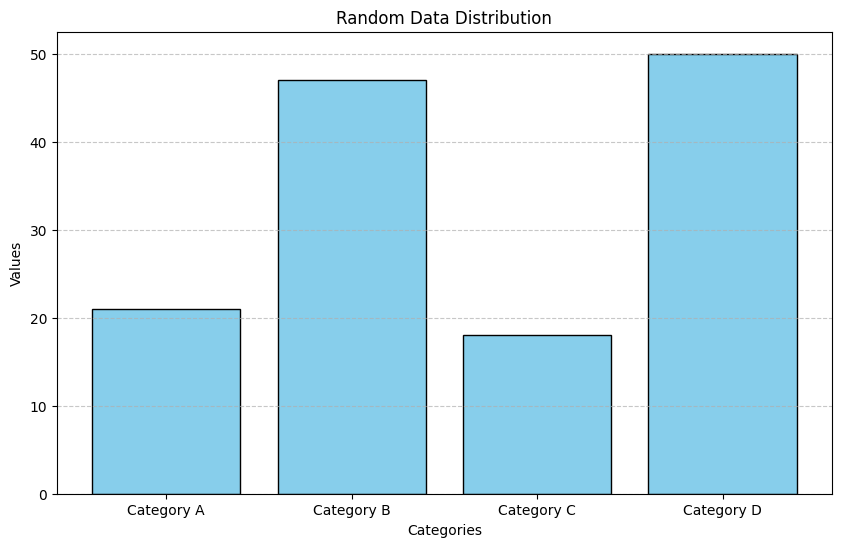

In [50]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = np.random.randint(10, 100, size=len(categories))

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Random Data Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<ipython-input-51-57d8fad5a0d7>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=50, ha='right')


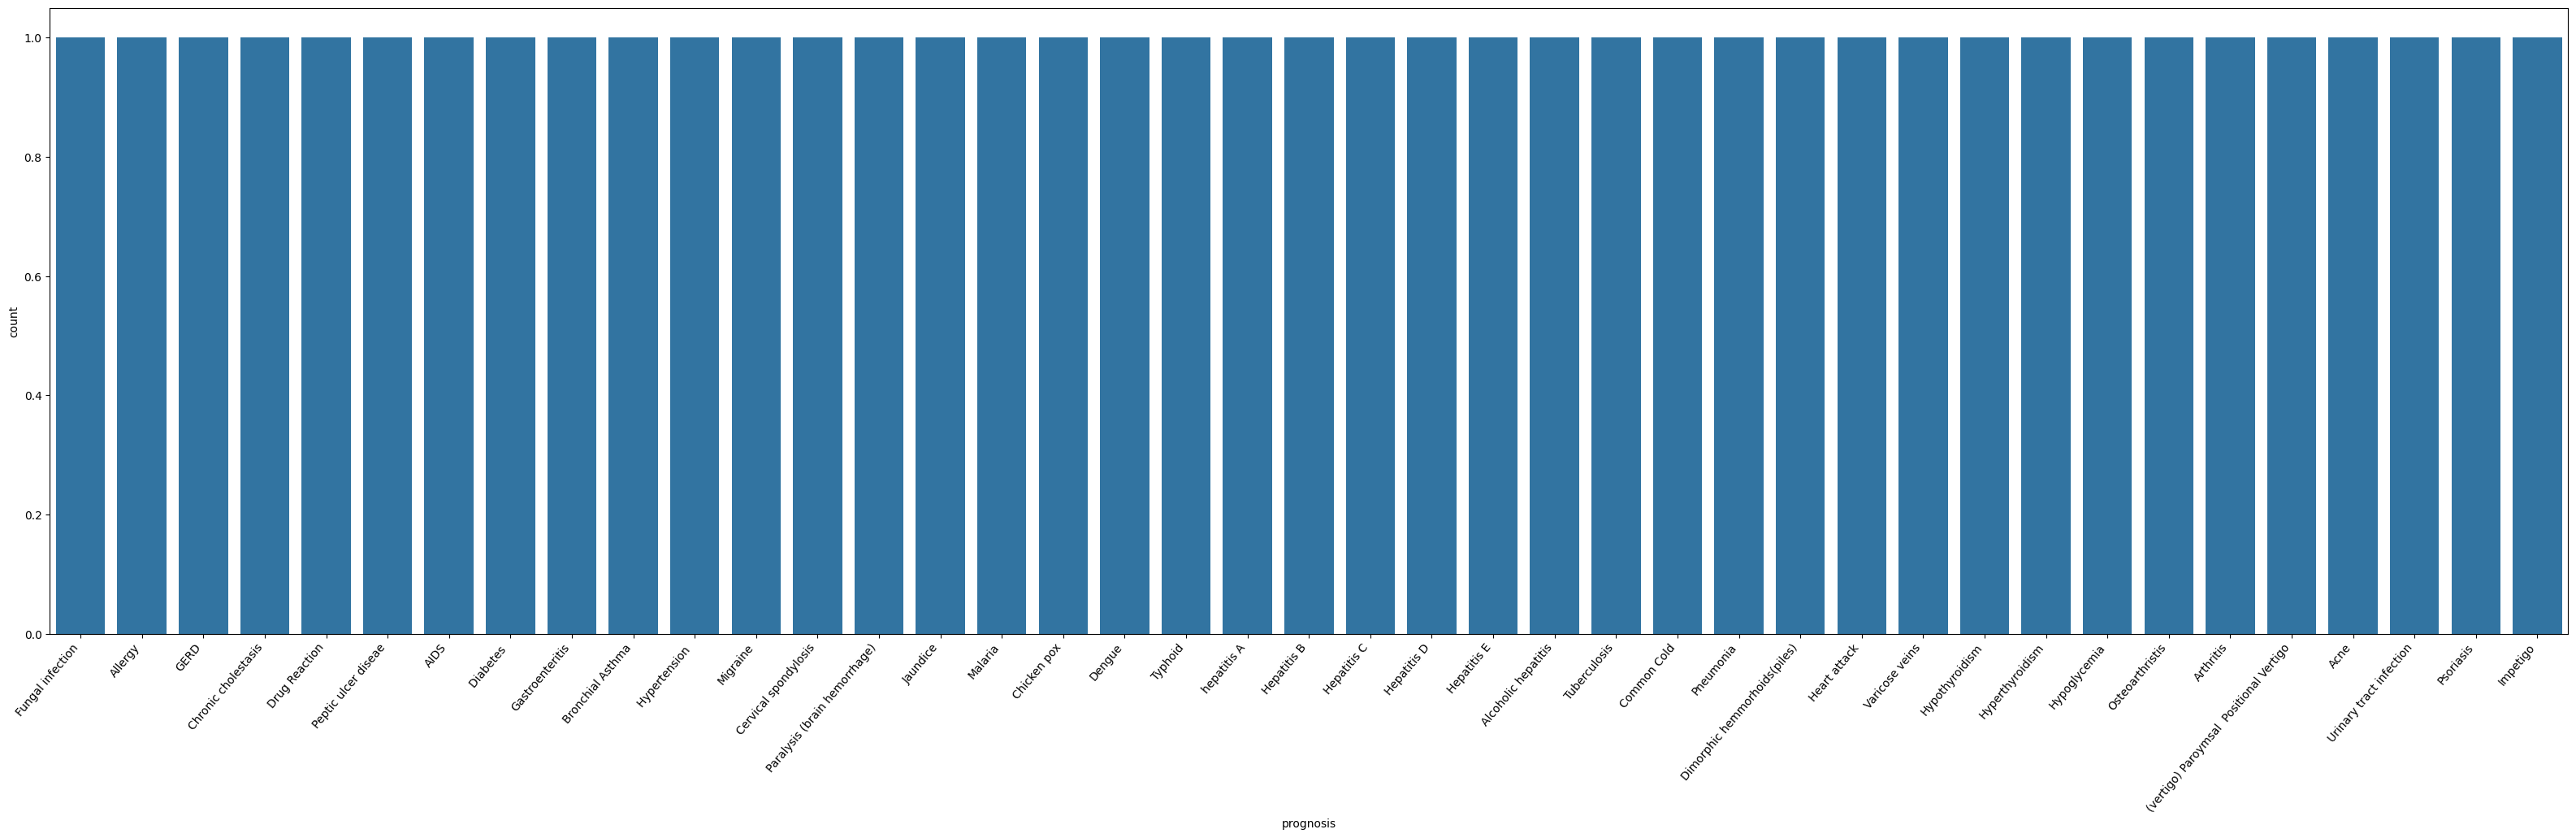

In [51]:
plt.figure(figsize=(40,10))

plot = sns.countplot(data=train_data, x='prognosis')
plot.set_xticklabels(plot.get_xticklabels(), rotation=50, ha='right')
plt.show()


<Axes: title={'center': 'skin_rash'}, xlabel='itching'>

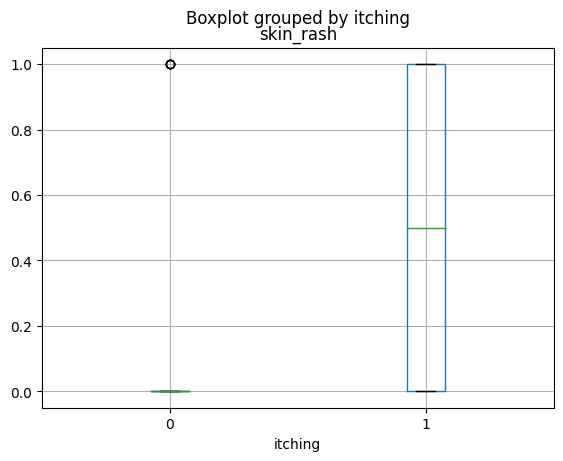

In [52]:
train_data.boxplot(column ='skin_rash', by='itching')

<Axes: >

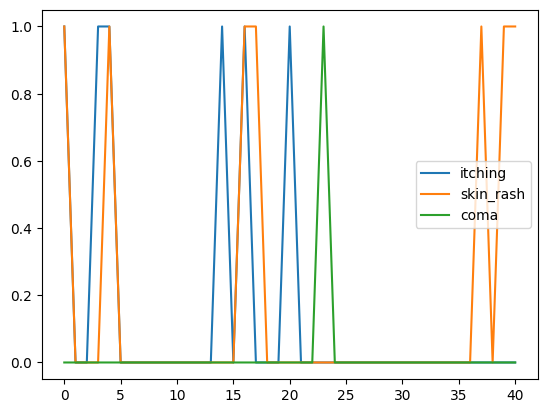

In [53]:
data1 =train_data.loc[:,["itching","skin_rash","coma"] ]
data1.plot()

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

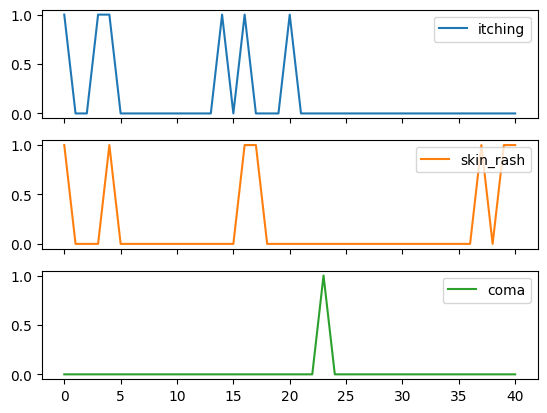

In [54]:
data1.plot(subplots =True)

<Axes: xlabel='depression', ylabel='stomach_pain'>

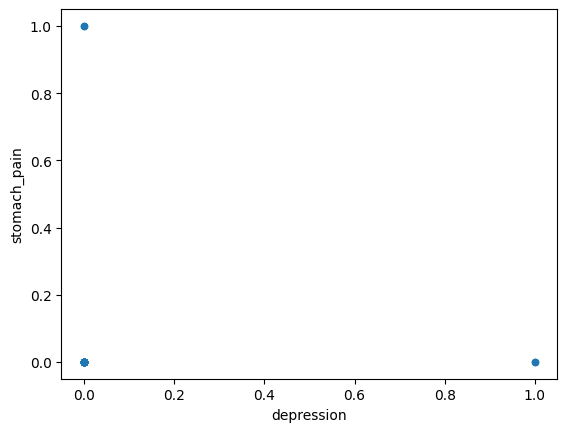

In [55]:
train_data.plot(kind= "scatter",x="depression", y="stomach_pain")

<ipython-input-56-e7010d7816b9>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=50, ha='right')


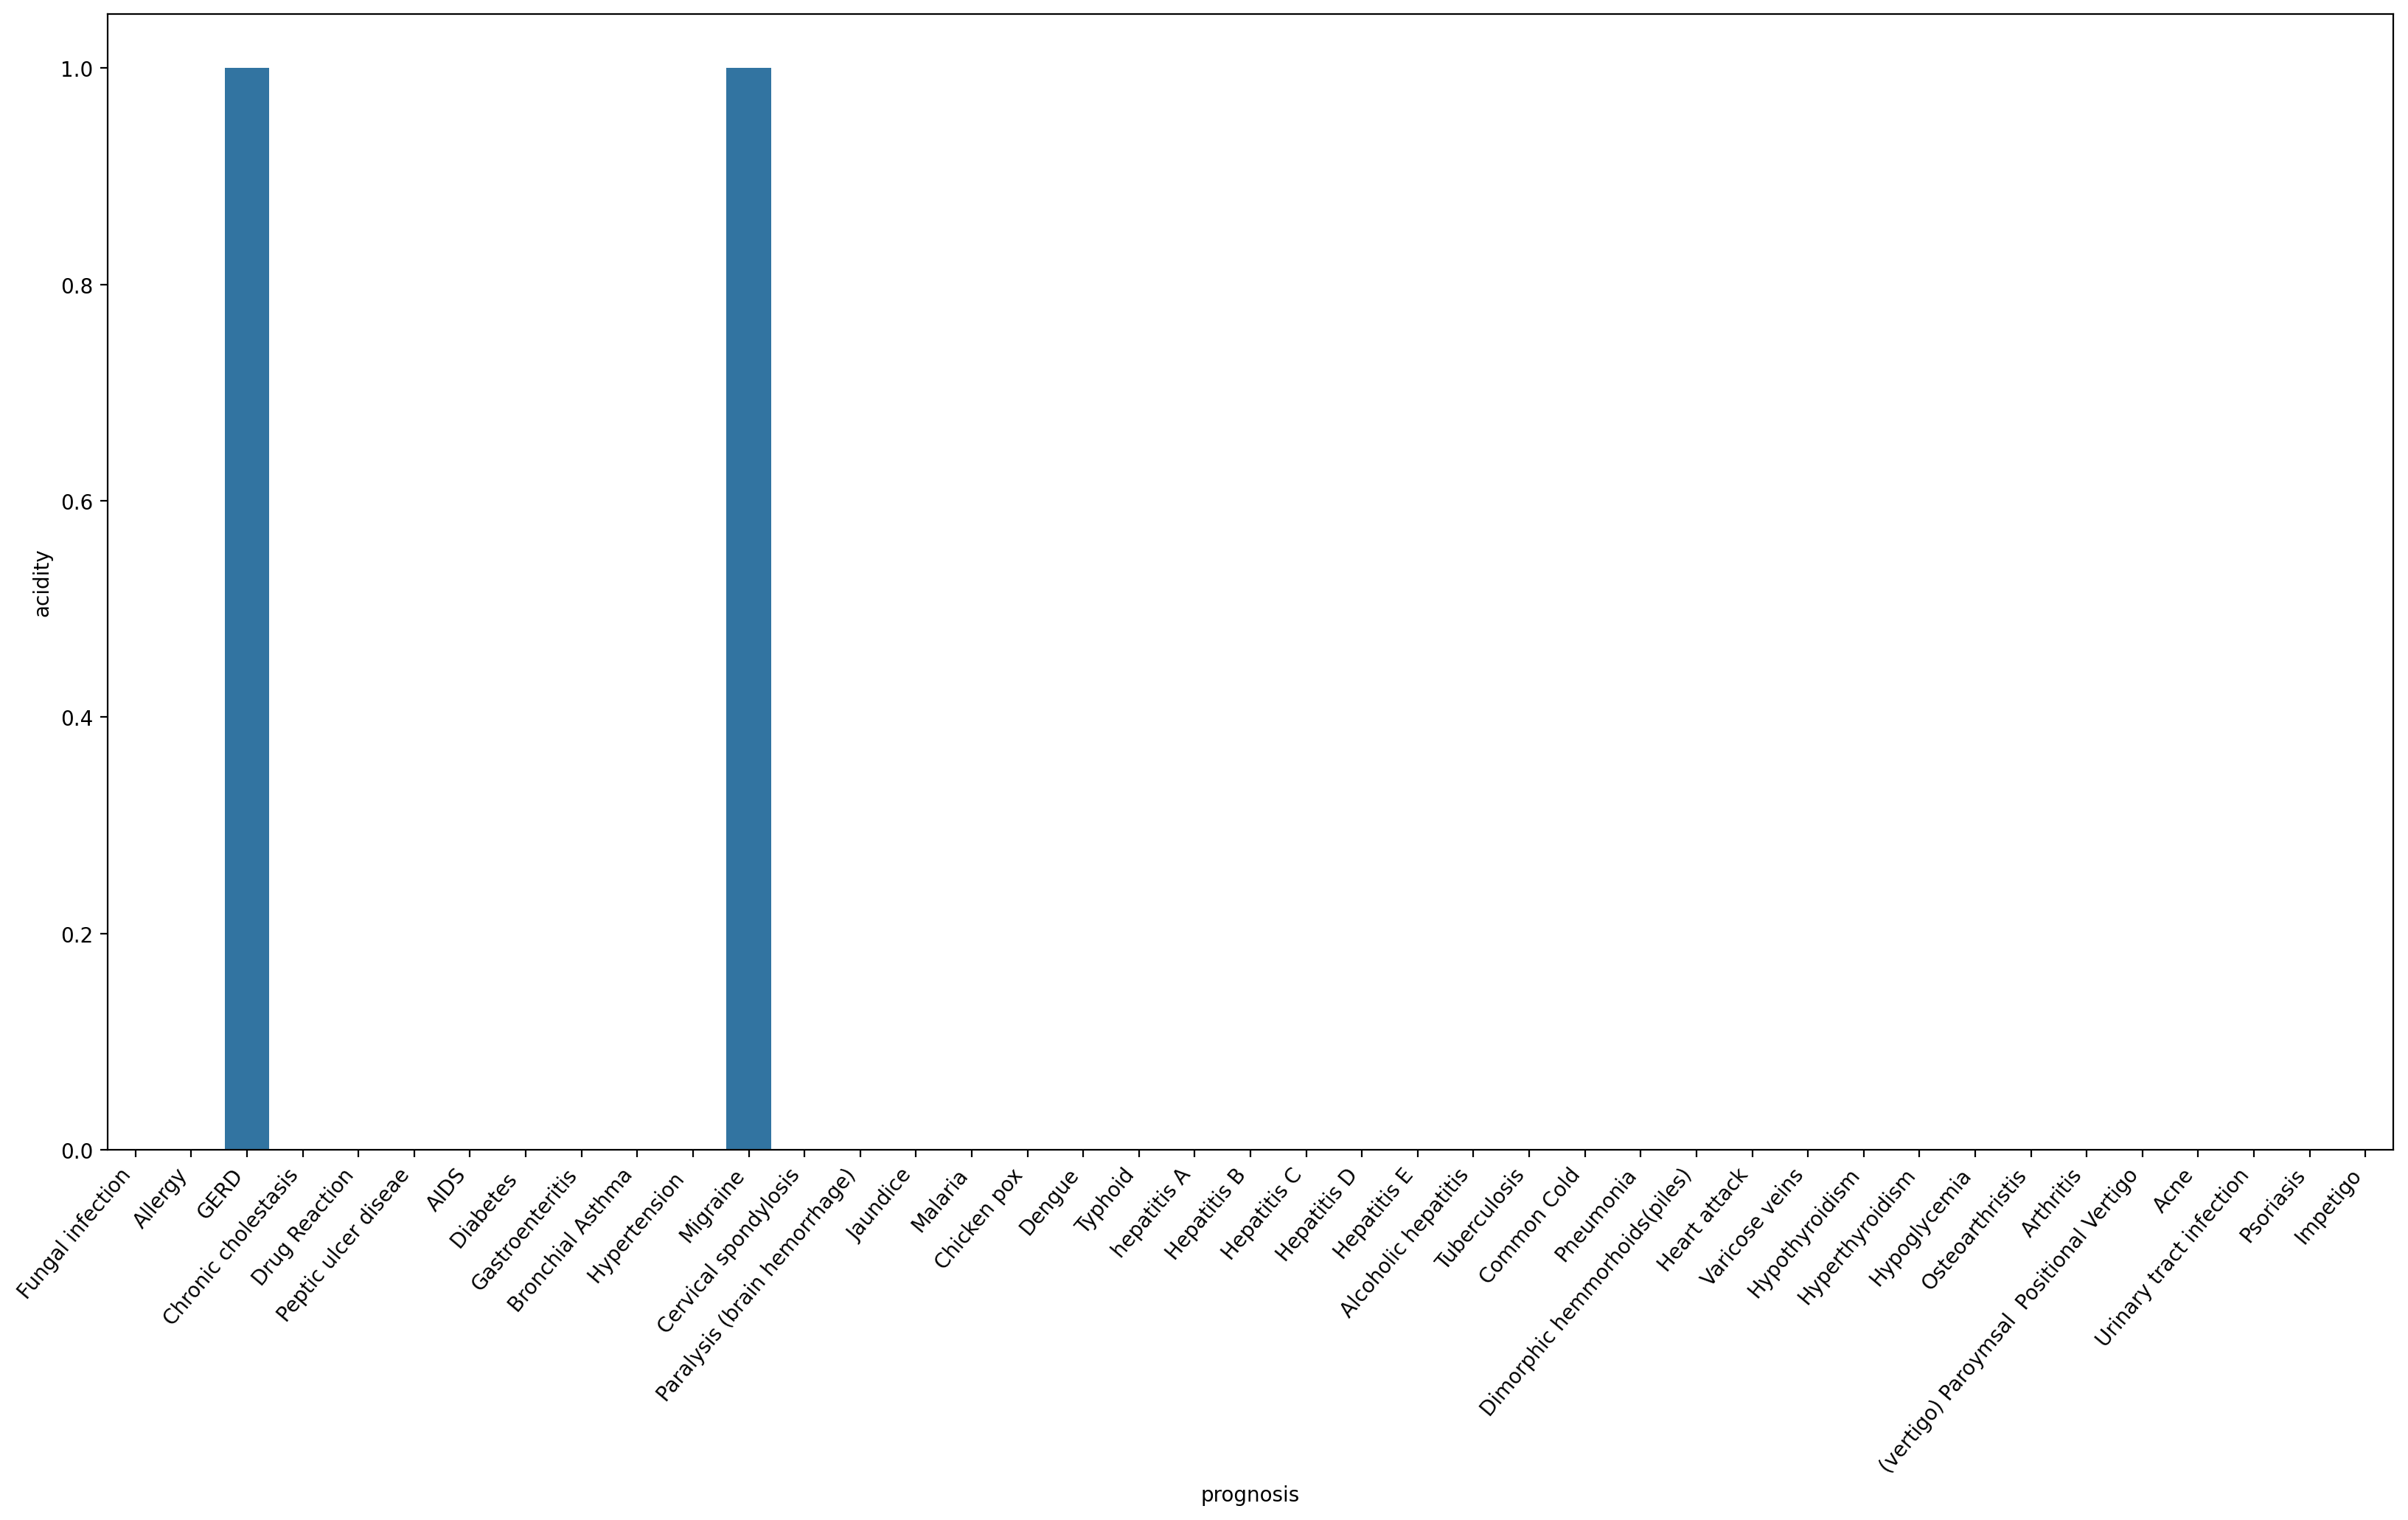

In [56]:
plt.figure(figsize=(20,10), dpi=200)
plot=sns.barplot(data=train_data, x='prognosis', y='acidity')
plot.set_xticklabels(plot.get_xticklabels(), rotation=50, ha='right')
plt.show()

<Axes: ylabel='Frequency'>

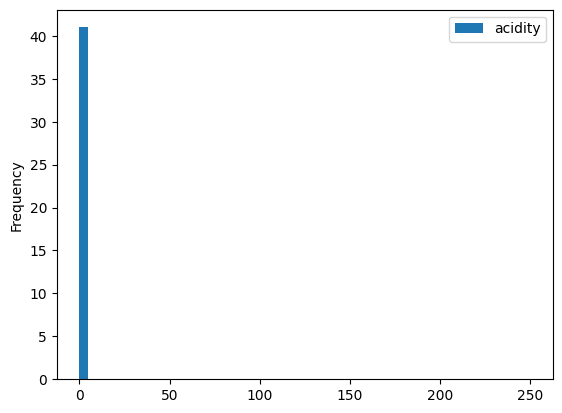

In [57]:
train_data.plot(kind="hist", y="acidity", bins = 50, range=(0,250))

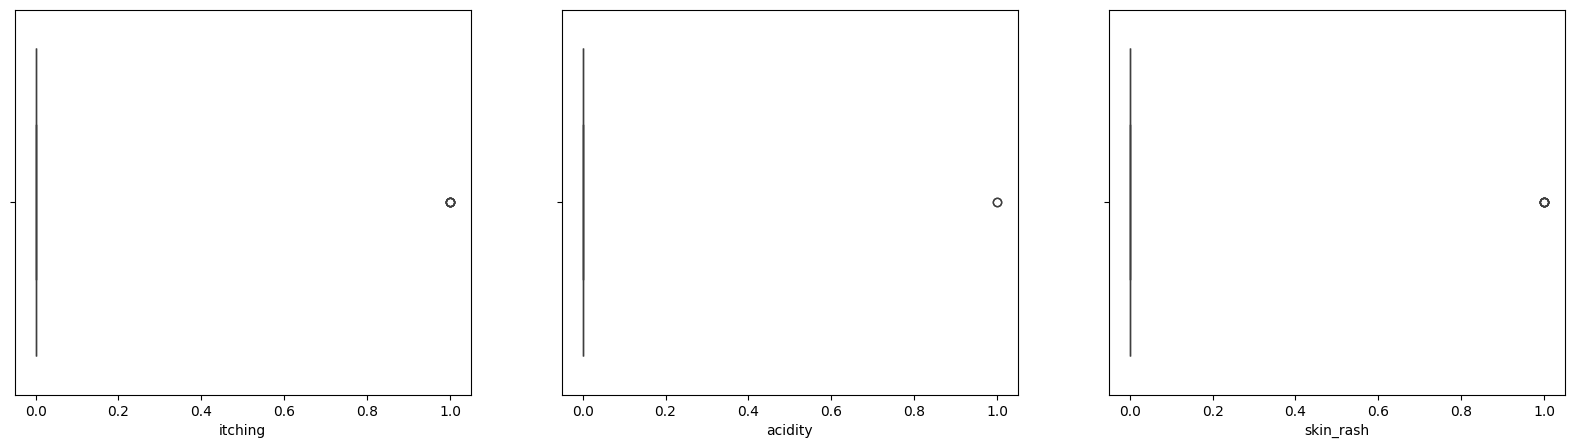

In [58]:
columns = {0:'itching' ,  1: 'acidity', 2:'skin_rash'}
fig, ax = plt.subplots(1,len(columns), figsize=(20, 5))
for key, val in columns.items():
    sns.boxplot(x=train_data[val], ax= ax[key])

In [59]:

y_encoded=pd.get_dummies(y_train)


In [60]:
y_encoded

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Encode the 'prognosis' column using label encoding, ensuring that all data is numerical before training the decision tree classifier.

In [61]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()
train_data['prognosis'] = label_encoder.fit_transform(train_data['prognosis'])






1- Decision Tree

In [62]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=30)
clf = clf.fit(x_train, y_train)

In [63]:
clf.get_depth()


8

In [64]:

clf.get_n_leaves()


30

In [65]:
print("Shape of X_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)


Shape of X_train: (41, 132)
Shape of x_test: (4920, 132)


In [81]:
print("Number of features in the trained model:", len(clf.feature_importances_))

Number of features in the trained model: 132


In [68]:
y_predict=clf.predict(x_test)
y_predict


array(['Drug Reaction', 'Impetigo', 'AIDS', ..., 'AIDS', 'Impetigo',
       'Impetigo'], dtype=object)

In [69]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.85      0.92       120
                                   AIDS       0.27      1.00      0.42       120
                                   Acne       1.00      0.85      0.92       120
                    Alcoholic hepatitis       0.42      0.90      0.57       120
                                Allergy       0.86      0.90      0.88       120
                              Arthritis       0.95      0.95      0.95       120
                       Bronchial Asthma       0.77      0.85      0.81       120
                   Cervical spondylosis       0.49      0.95      0.64       120
                            Chicken pox       1.00      0.85      0.92       120
                    Chronic cholestasis       0.94      0.85      0.89       120
                            Common Cold       0.49      0.90      0.63       120
                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
y_pred=clf.predict(x_train)

print("Training accuracy: ", accuracy_score(y_train, y_pred))
print("Testing accuracy: ", accuracy_score(y_test, y_predict))


Training accuracy:  0.7317073170731707
Testing accuracy:  0.6439024390243903


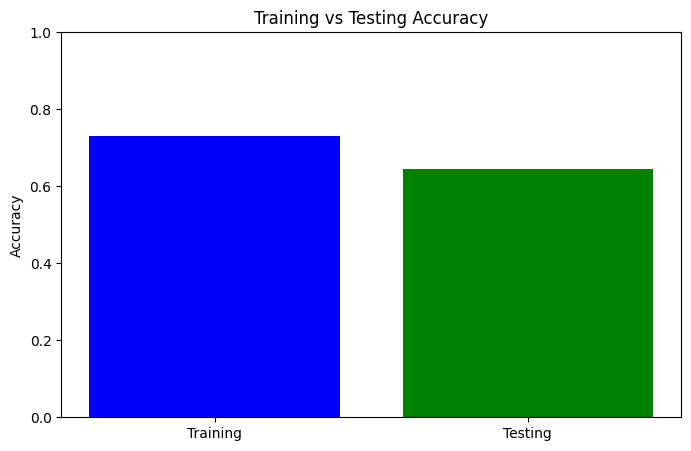

In [71]:
import matplotlib.pyplot as plt

# Assuming you have calculated the training and testing accuracies
train_accuracy = accuracy_score(y_train, y_pred)
test_accuracy = accuracy_score(y_test, y_predict)

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


2- Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_leaf=4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(x_train,y_train)

y_pred2=clf2.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred2))

Accuracy: 0.5451219512195122


In [73]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred2))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.90      0.95       120
                                   AIDS       0.86      0.95      0.90       120
                                   Acne       0.42      0.95      0.58       120
                    Alcoholic hepatitis       0.00      0.00      0.00       120
                                Allergy       1.00      0.90      0.95       120
                              Arthritis       0.00      0.00      0.00       120
                       Bronchial Asthma       1.00      0.75      0.86       120
                   Cervical spondylosis       0.21      1.00      0.34       120
                            Chicken pox       1.00      1.00      1.00       120
                    Chronic cholestasis       0.00      0.00      0.00       120
                            Common Cold       1.00      0.95      0.97       120
                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3- MLP

In [74]:
from sklearn.neural_network import MLPClassifier
MLPclf=MLPClassifier(activation='relu',hidden_layer_sizes=(100,),solver='adam', early_stopping=True)
MLPclf.fit(x_train,y_train)

MLPClassifier(early_stopping=True)

In [78]:
y_pred3=MLPclf.predict(x_test)

In [77]:
print("Accuracy:",accuracy_score(y_test, y_pred3))

Accuracy: 0.02195121951219512


In [79]:
print(classification_report(y_test,y_pred3))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00       120
                                   AIDS       0.00      0.00      0.00       120
                                   Acne       0.00      0.00      0.00       120
                    Alcoholic hepatitis       0.00      0.00      0.00       120
                                Allergy       0.18      0.90      0.30       120
                              Arthritis       0.00      0.00      0.00       120
                       Bronchial Asthma       0.00      0.00      0.00       120
                   Cervical spondylosis       0.00      0.00      0.00       120
                            Chicken pox       0.00      0.00      0.00       120
                    Chronic cholestasis       0.00      0.00      0.00       120
                            Common Cold       0.00      0.00      0.00       120
                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4- SVM

In [80]:

svm = SVC(kernel='linear', C=1.0, random_state=42)

svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 1.0
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       1.00      1.00      1.00       120
                                   Acne       1.00      1.00      1.00       120
                    Alcoholic hepatitis       1.00      1.00      1.00       120
                                Allergy       1.00      1.00      1.00       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       1.00      1.00      1.00       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       1.00      1.00      1.00       120
                    Chronic cholestasis       1.00      1.00      1.00       120
                            Common Cold       1.00      1.00      1.00 